In [2]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def histogram_equalization(img, nbr_bins=256):
    # đảm bảo hình ảnh đầu vào là ảnh xám
    if img.mode != 'L':
        img = img.convert('L')

    # chuyển ảnh thành mảng numpy
    img_arr = np.array(img)

    # tính toán histogram của ảnh
    histogram, bins = np.histogram(img_arr, bins=nbr_bins, range=(0,256), density=True)

    # tính toán hàm phân phối tích lũy (CDF - Cumlative distribution Func)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    # lấy giá trị mới cho từng pixel dựa trên CDF
    img_eq = np.interp(img_arr, bins[:-1], cdf)

    # chuyen doi mang ket qua thanh hinh anh
    eq_img = Image.fromarray(img_eq.astype('uint8'))

    return eq_img

Text(0.5, 1.0, 'Rebalance Histogram')

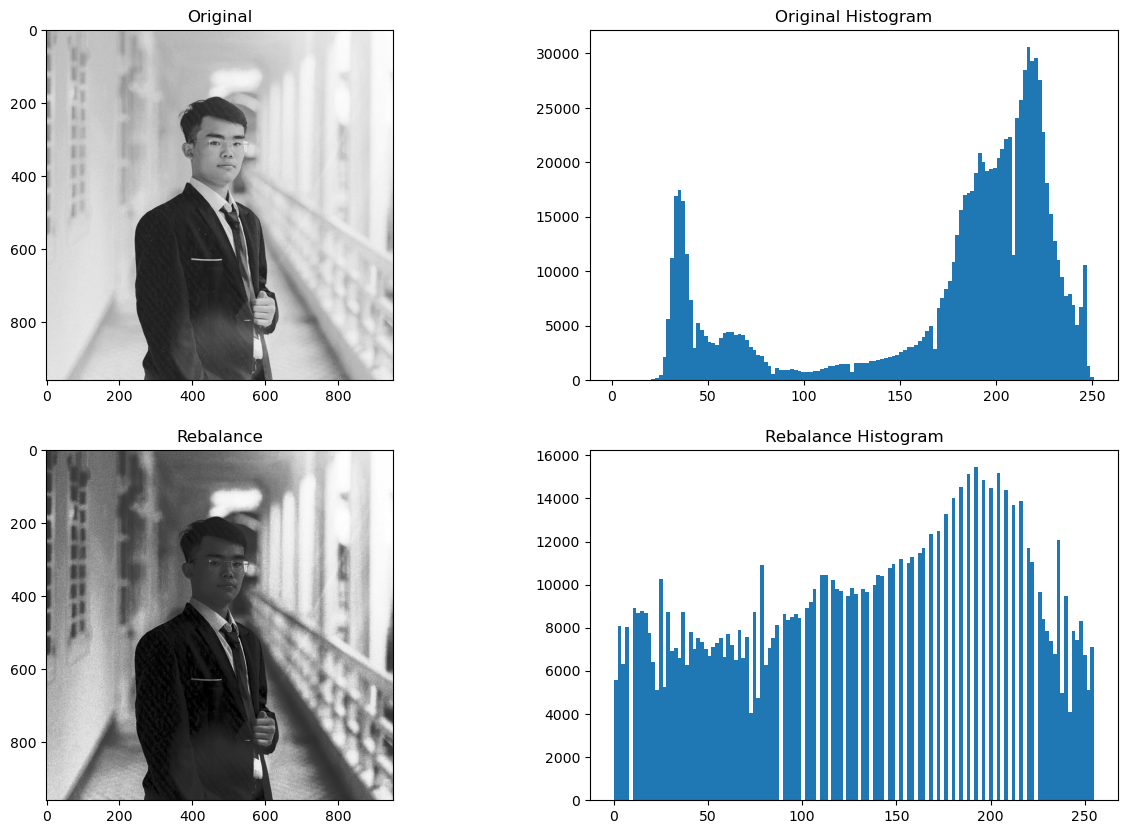

In [7]:
# duong dan anh
my_dir = 'C:/Users/Admin/Documents/CVs/img/'
my_path = my_dir + "2.jpg";

# doc anh
img = Image.open(my_path)

#chuyen sang anh xam
img_gray = img.convert('L')

# ap dung can bang luoc do anh xam
eq_img = histogram_equalization(img_gray)

# tạo lưới 2x2 show ảnh và biểu đồ
plt.figure(figsize=(15,10))

# ảnh gốc
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")

# ảnh gốc histogram
plt.subplot(2,2,2)
plt.hist(np.array(img_gray).flatten(), bins = 128)
plt.title("Original Histogram")


# ảnh đã cân bằng
plt.subplot(2,2,3)
plt.imshow(eq_img, cmap='gray')
plt.title("Rebalance")

# ảnh gốc histogram
plt.subplot(2,2,4)
plt.hist(np.array(eq_img).flatten(), bins = 128)
plt.title("Rebalance Histogram")